# datenguide-python
## Easy python access to German regional statistics
(package teaser)

![datenguide project](datenguidemain.png)

![datenguide project](datenguidemember.png)

# Datenguide goal

## Make data that is officially public also public in practice
Public data is often
 - hard to find
 - inconvenient to search
 - returned in inconvenient formats
 
## Data Content
<ul>
    <li>data from <a href="https://www.regionalstatistik.de/genesis/online/">
    https://www.regionalstatistik.de/genesis/online/</a></li>
    <li>data from German govermental statistics agencies</li>
    <li>approx. 400 statistics</li>
    <li>approx. 14,000 German regions of variing granularity</li>
    <li>statistics cover a range of ares like economic, social, and enviromental</li>
</ul>

<h1> datenguide-python made by CorrelAid<img src="correlaid-icon.svg" width="50"/> </h1>

We are a non-profit organisation for using data science for good
- open data projects
- pro bono data science consulting for other non-profit organisations/projects

[https://correlaid.org/en/](https://correlaid.org/en/)

Project team

 Alex|Kristian|Konrad|Barbara
 ----|--------|-------|------
 <img src="Alex" width="100">|<img src="Kristian" width="100">|<img src="Konrad" width="100">|

# Pyhon package overview

- Low entry threshold for package usage
- Convenient access to data
- Aims for good defaults in granularity of selected data
- No data modifcation! (you have to clean and analyze yourself <span>&#128578;</span>)

In [1]:
%cd ../..

/home/konrad/programming/python/correlaid/datenguide-python


In [2]:
from datenguide_python.query_builder import Query

q = Query.region('01')
statistic = q.add_field('BEV001')

q.results().head()

,id,name,year,BEV001,BEV001_source_title_de,BEV001_source_valid_from,BEV001_source_periodicity,BEV001_source_name,BEV001_source_url
0,01,Schleswig-Holstein,1995,27430,Statistik der Geburten,1995-01-01T00:00:00,JAEHRLICH,12612,None
1,01,Schleswig-Holstein,1996,28766,Statistik der Geburten,1995-01-01T00:00:00,JAEHRLICH,12612,None
2,01,Schleswig-Holstein,1997,29080,Statistik der Geburten,1995-01-01T00:00:00,JAEHRLICH,12612,None
3,01,Schleswig-Holstein,1998,27729,Statistik der Geburten,1995-01-01T00:00:00,JAEHRLICH,12612,None
4,01,Schleswig-Holstein,1999,27351,Statistik der Geburten,1995-01-01T00:00:00,JAEHRLICH,12612,None


In [3]:
q.results().head().iloc[:,:4]

,id,name,year,BEV001
0,01,Schleswig-Holstein,1995,27430
1,01,Schleswig-Holstein,1996,28766
2,01,Schleswig-Holstein,1997,29080
3,01,Schleswig-Holstein,1998,27729
4,01,Schleswig-Holstein,1999,27351


# Wait how do I know the weird codes like "01" and "BEV001"

In [4]:
from datenguide_python.query_helper import get_all_regions

regions = get_all_regions()
regions.head()

,name,level,parent
id,,,
10,Saarland,nuts1,DG
11,Berlin,nuts1,DG
12,Brandenburg,nuts1,DG
13,Mecklenburg-Vorpommern,nuts1,DG
14,Sachsen,nuts1,DG


In [5]:
berlin_districts = regions.query('parent == "11" and level == "nuts3"').loc[:,'name']
berlin_districts.head()

id
11001                         Berlin-Mitte
11002      Berlin-Friedrichshain-Kreuzberg
11003                        Berlin-Pankow
11004    Berlin-Charlottenburg-Wilmersdorf
11005                       Berlin-Spandau
Name: name, dtype: object

In [6]:
from datenguide_python.query_helper import get_statistics

stats = get_statistics()
stats.head()

,statistics,short_description,long_description
0,AENW01,Entsorgte/behandelte Abfallmenge a.d. eig. BL,**Entsorgte/behandelte Abfallmenge a.d. eig. B...
1,AENW02,Abgelagerte Abfallmenge in Deponien,**Abgelagerte Abfallmenge in Deponien**\n *...
2,AENW03,Entsorg.u.Behandlungsanl.(o.Sortier.u.Zerlege.),**Entsorg.u.Behandlungsanl.(o.Sortier.u.Zerleg...
3,AENW04,Entsorgte/behandelte Abfallmenge a.d. eig. BL,**Entsorgte/behandelte Abfallmenge a.d. eig. B...
4,AENW05,Abgelagerte Abfallmenge in Deponien,**Abgelagerte Abfallmenge in Deponien**\n *...


In [7]:
stats[stats.short_description.str.contains('wohnungen',case=False)]

,statistics,short_description,long_description
29,AI_Z15,Wohnungen je Wohngebäude,**Wohnungen je Wohngebäude**\n*aus GENESIS-Sta...
117,AI1101,Anteil neue Wohngebäude mit 1 oder 2 Wohnungen,**Anteil neue Wohngebäude mit 1 oder 2 Wohnung...
388,RME009,Räume in Wohnungen mit 7 oder mehr Räumen,**Räume in Wohnungen mit 7 oder mehr Räumen*...
389,RMENW9,Räume in Wohnungen mit 7 und mehr Räumen,**Räume in Wohnungen mit 7 und mehr Räumen**...
465,WOGWZ1,Wohnungen in Gebäuden mit Wohnraum,**Wohnungen in Gebäuden mit Wohnraum**\n *a...
466,WOH016,Wohnungen in neuen Nichtwohngebäuden,**Wohnungen in neuen Nichtwohngebäuden**\n ...
467,WOHN01,Wohnungen,"**Wohnungen**\n *aus GENESIS-Statistik ""For..."
468,WOHN02,Wohnungen,"**Wohnungen**\n *aus GENESIS-Statistik ""Sta..."
469,WOHN03,Wohnungen in Wohngebäuden,**Wohnungen in Wohngebäuden**\n *aus GENESI...
470,WOHN04,Wohnungen in Wohngebäuden (ohne Wohnheime),**Wohnungen in Wohngebäuden (ohne Wohnheime)...


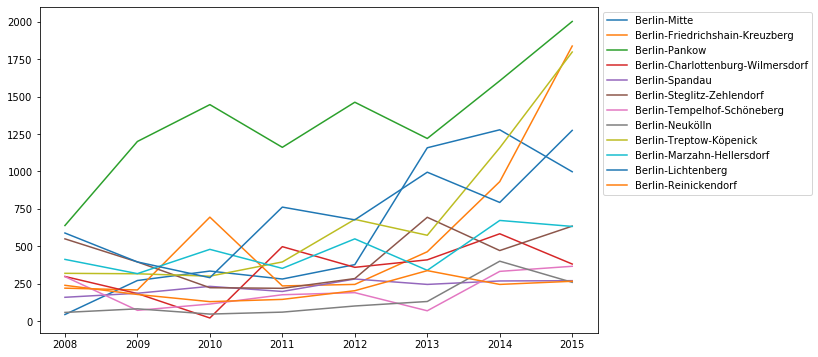

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.gca()
for region_code,region_name in berlin_districts.iteritems():
    q = Query.region(region_code)
    statistic = q.add_field('WOHN02')
    results = (
        q.results()
        .query('WOHN02_source_title_de  == "Statistik der Baufertigstellungen"')
    )
    ax.plot(results.year,results.WOHN02,label=region_name)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(10,6)


# Whats next

## For the audience we hope 
`pip install datenguide-python`

## For us 
 - more convenience functionality for users
 - gather interesting use cases

# Thank you for your attention